# Federico Ariton


# Business Objective
To improve customer retention, increase revenue, and optimize marketing effectiveness by delivering personalized offers based on customer segmentation derived from historical transaction data.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Load the Excel file correctly
df = pd.read_excel('Online_Retail.xlsx', sheet_name=0)  # sheet_name might vary if multiple sheets exist

# Preview the dataset
print(df.head())
print(df.columns)



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [2]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [3]:
df.shape

(541909, 8)

In [5]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [6]:
# Checking missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
# Count the number of unique product descriptions
unique_products = df['Description'].nunique()
unique_products


4223

# Data Clenaning

### Converting Data time

In [16]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [17]:
duplicates_all = df[df.duplicated(keep=False)]
duplicates_all.sort_values(by=df.columns.tolist()).head()


InvoiceNo StockCode                    Description  Quantity  \
494    536409     21866    UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866    UNION JACK FLAG LUGGAGE TAG         1   
485    536409     22111   SCOTTIE DOG HOT WATER BOTTLE         1   
539    536409     22111   SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866  HAND WARMER SCOTTY DOG DESIGN         1   

            InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
494 2010-12-01 11:45:00       1.25     17908.0  United Kingdom        1.25  
517 2010-12-01 11:45:00       1.25     17908.0  United Kingdom        1.25  
485 2010-12-01 11:45:00       4.95     17908.0  United Kingdom        4.95  
539 2010-12-01 11:45:00       4.95     17908.0  United Kingdom        4.95  
489 2010-12-01 11:45:00       2.10     17908.0  United Kingdom        2.10

### Handeling duplicate rows

In [19]:
# Check for duplicates
df.duplicated().sum()

5268

In [20]:
df = df.drop_duplicates()

In [21]:
# Check for duplicates
df.duplicated().sum()

0

### Create a new feature TotalPrice

In [23]:
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

### Handeling Inconsistencies such a Canceled orders and return

In [25]:
df[df['Quantity'] <= 0]       # Returns or errors
df[df['UnitPrice'] <= 0]      # Free items, errors, or promotions
df[df['TotalPrice'] <= 0]     # Should be > 0 if Quantity and UnitPrice are valid

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom      -27.50  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom       -4.65  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom      -19.80  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom       -6.96  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom       -6.96  
...                    ...        ...         ...             ...         ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom       -9.13  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom     -224.69  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom      -54.75  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom       -1.25  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom       -6.25  

[11763 rows x 9 columns]

In [26]:
# Filter out invalid rows
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & (df['TotalPrice'] > 0)]

In [27]:
df = df.dropna(subset=['CustomerID'])


In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].describe()


count                           392692
mean     2011-07-10 19:13:07.771892480
min                2010-12-01 08:26:00
25%                2011-04-07 11:12:00
50%                2011-07-31 12:02:00
75%                2011-10-20 12:53:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [29]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
...                    ...        ...         ...             ...         ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France       10.20  
541905 2011-12-09 12:50:00       2.10     12680.0          France       12.60  
541906 2011-12-09 12:50:00       4.15     12680.0          France       16.60  
541907 2011-12-09 12:50:00       4.15     12680.0          France       16.60  
541908 2011-12-09 12:50:00       4.95     12680.0          France       14.85  

[392692 rows x 9 columns]

In [30]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
dtype: object

In [31]:
df['CustomerID'] = df['CustomerID'].astype(str)


In [55]:
# Checking missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [32]:
df.duplicated().sum()  # Full row duplicates
df.duplicated(subset=['InvoiceNo', 'StockCode']).sum()  # Same item in same order


10684

# Eda

### Time-Based EDA

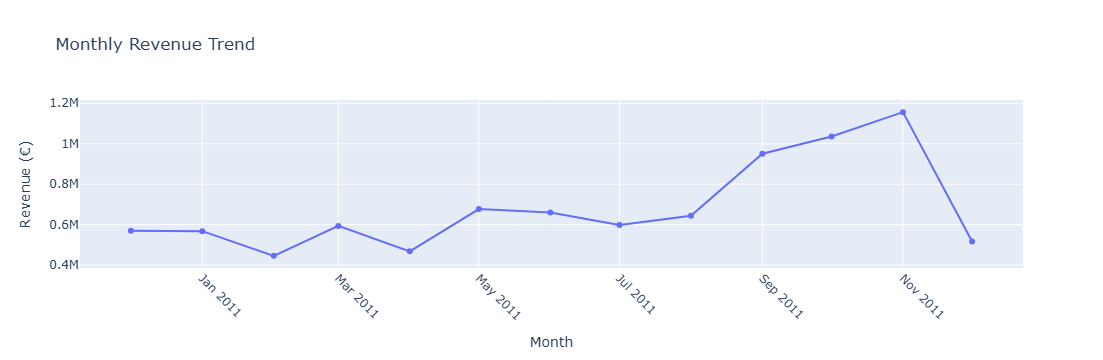

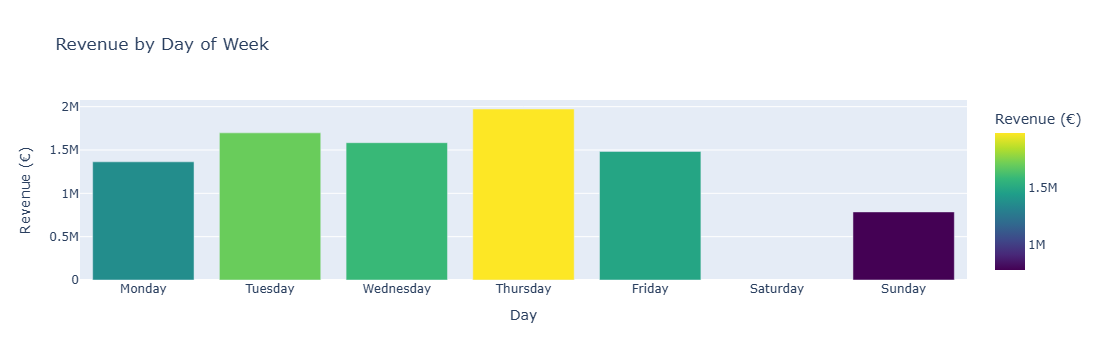

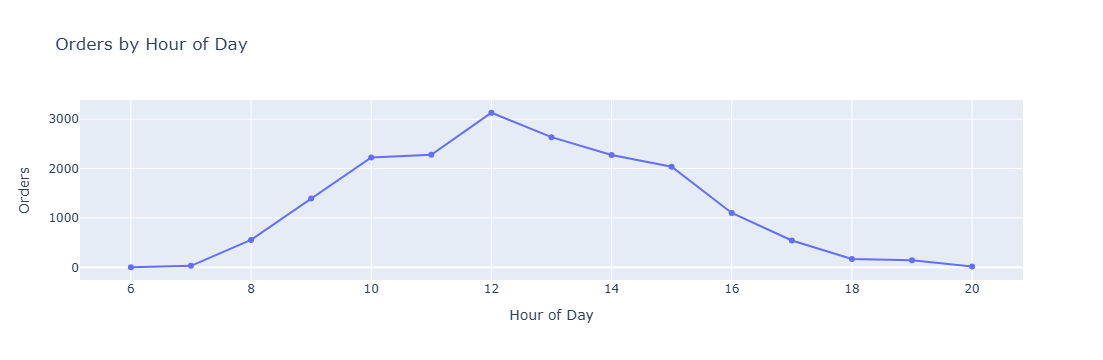

In [57]:
import pandas as pd
import plotly.express as px

# Assuming your cleaned DataFrame is `df`
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

# Monthly Revenue
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

# Revenue by Day of Week
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_revenue = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex(dow_order).reset_index()

# Orders by Hour
hourly_orders = df.groupby('Hour')['InvoiceNo'].nunique().reset_index(name='OrderCount')

# 1. Monthly Revenue Line Chart
fig1 = px.line(monthly_revenue, x='YearMonth', y='TotalPrice', markers=True,
               title='Monthly Revenue Trend',
               labels={'YearMonth': 'Month', 'TotalPrice': 'Revenue (â‚¬)'})
fig1.update_layout(xaxis_tickangle=45)
fig1.show()

# 2. Revenue by Day of Week
fig2 = px.bar(dow_revenue, x='DayOfWeek', y='TotalPrice',
              title='Revenue by Day of Week',
              labels={'DayOfWeek': 'Day', 'TotalPrice': 'Revenue (â‚¬)'},
              color='TotalPrice',
              color_continuous_scale='Viridis')
fig2.show()

# 3. Orders by Hour
fig3 = px.line(hourly_orders, x='Hour', y='OrderCount', markers=True,
               title='Orders by Hour of Day',
               labels={'Hour': 'Hour of Day', 'OrderCount': 'Orders'})
fig3.show()


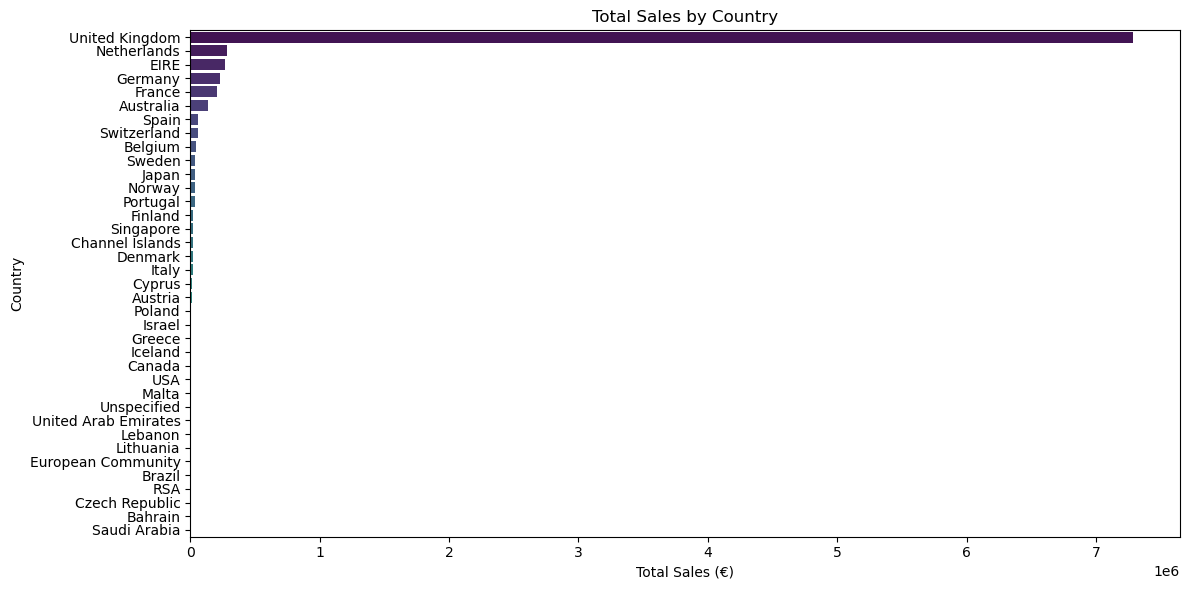

Country   TotalPrice
0         United Kingdom  7285024.644
1            Netherlands   285446.340
2                   EIRE   265262.460
3                Germany   228678.400
4                 France   208934.310
5              Australia   138453.810
6                  Spain    61558.560
7            Switzerland    56443.950
8                Belgium    41196.340
9                 Sweden    38367.830
10                 Japan    37416.370
11                Norway    36165.440
12              Portugal    33375.840
13               Finland    22546.080
14             Singapore    21279.290
15       Channel Islands    20440.540
16               Denmark    18955.340
17                 Italy    17483.240
18                Cyprus    13502.850
19               Austria    10198.680
20                Poland     7334.650
21                Israel     7215.840
22                Greece     4760.520
23               Iceland     4310.000
24                Canada     3666.380
25                   USA     3580.390
26                 Malta     2725.590
27           Unspecified     2660.770
28  United Arab Emirates     1902.280
29               Lebanon     1693.880
30             Lithuania     1661.060
31    European Community     1300.250
32                Brazil     1143.600
33                   RSA     1002.310
34        Czech Republic      826.740
35               Bahrain      548.400
36          Saudi Arabia      145.920

In [59]:
# Group by country and sum total sales
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

# Plot the total sales by country
plt.figure(figsize=(12, 6))
sns.barplot(data=country_sales, x='TotalPrice', y='Country', palette='viridis')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales (â‚¬)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

country_sales

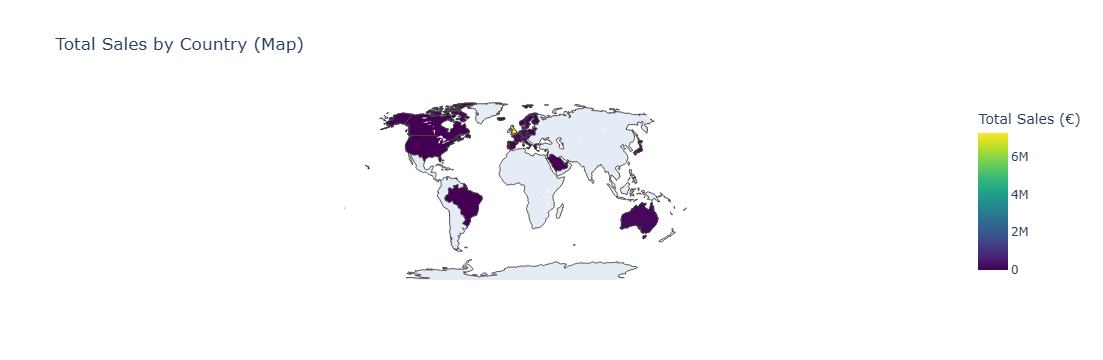

In [61]:
import plotly.express as px

# Aggregate sales by country
country_sales = df.groupby('Country', as_index=False)['TotalPrice'].sum()
country_sales.columns = ['Country', 'Total Sales (â‚¬)']

# Plot interactive map
fig = px.choropleth(
    country_sales,
    locations='Country',
    locationmode='country names',
    color='Total Sales (â‚¬)',
    color_continuous_scale='Viridis',
    title='Total Sales by Country (Map)',
)

fig.update_layout(geo=dict(showframe=False, projection_type='natural earth'))
fig.show()

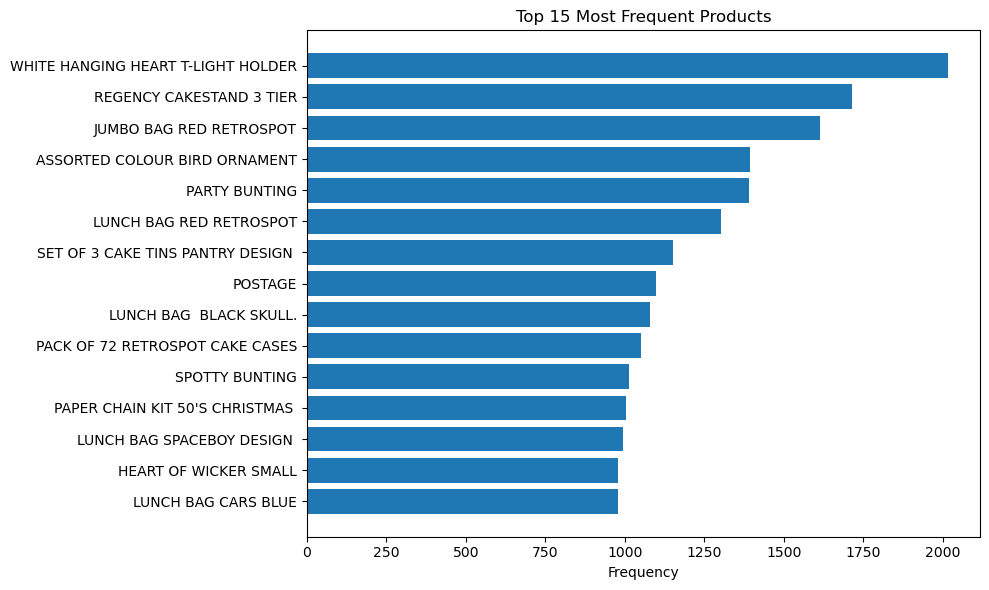

In [63]:
# Display the unique product descriptions and their frequency
product_counts = df['Description'].value_counts().reset_index()
product_counts.columns = ['Description', 'Frequency']

# Show the top 15 most frequent product descriptions
top_products = product_counts.head(15)

# Plot the top products
plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'][::-1], top_products['Frequency'][::-1])
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Products')
plt.tight_layout()
plt.show()


# Statistical Analysis

# RFM

To compute the RFM (Recency, Frequency, Monetary) values for each customer, we first create a new column called `TotalPrice`, which represents the total transaction value by multiplying the `Quantity` and `UnitPrice` of each item. Next, we define a `reference_date` as one day after the latest purchase date in the dataset. This acts as a fixed point in time from which recency is calculated. Using the `groupby()` function on `CustomerID`, we calculate: **Recency** as the number of days between the customer's most recent purchase and the reference date, **Frequency** as the number of unique invoices (purchases) made by the customer, and **Monetary** as the total amount spent by the customer across all transactions. The aggregation results are then renamed to clearly reflect each RFM metric, and the table is reset to a flat DataFrame. This RFM table serves as the foundation for customer segmentation and further analysis.


In [76]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [82]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
0      2010-12-01 08:26:00       2.55    17850.0  United Kingdom       15.30   
1      2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   
2      2010-12-01 08:26:00       2.75    17850.0  United Kingdom       22.00   
3      2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   
4      2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   
...                    ...        ...        ...             ...         ...   
541904 2011-12-09 12:50:00       0.85    12680.0          France       10.20   
541905 2011-12-09 12:50:00       2.10    12680.0          France       12.60   
541906 2011-12-09 12:50:00       4.15    12680.0          France       16.60   
541907 2011-12-09 12:50:00       4.15    12680.0          France       16.60   
541908 2011-12-09 12:50:00       4.95    12680.0          France       14.85   

       YearMonth  DayOfWeek  Hour  
0        2010-12  Wednesday     8  
1        2010-12  Wednesday     8  
2        2010-12  Wednesday     8  
3        2010-12  Wednesday     8  
4        2010-12  Wednesday     8  
...          ...        ...   ...  
541904   2011-12     Friday    12  
541905   2011-12     Friday    12  
541906   2011-12     Friday    12  
541907   2011-12     Friday    12  
541908   2011-12     Friday    12  

[392692 rows x 12 columns]

In [78]:
# Aggregate RFM features
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                         # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

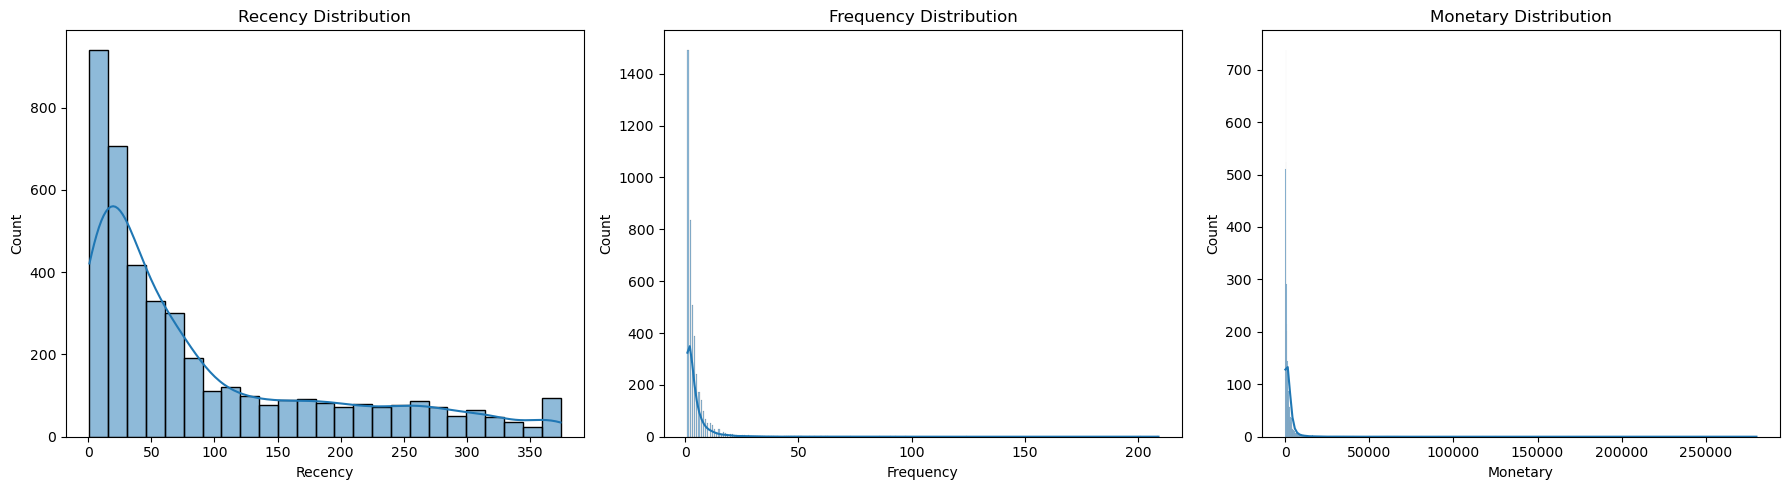

CustomerID  Recency  Frequency  Monetary
0    12346.0      326          1  77183.60
1    12347.0        2          7   4310.00
2    12348.0       75          4   1797.24
3    12349.0       19          1   1757.55
4    12350.0      310          1    334.40

In [80]:
# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], kde=True, ax=axes[0])
axes[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], kde=True, ax=axes[1])
axes[1].set_title('Frequency Distribution')

sns.histplot(rfm['Monetary'], kde=True, ax=axes[2])
axes[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

rfm.head()

In [84]:
# Descriptive statistics + skewness + kurtosis
rfm_desc = rfm.describe().T
rfm_desc['skewness'] = rfm.skew()
rfm_desc['kurtosis'] = rfm.kurtosis()

rfm_desc

count         mean          std   min       25%     50%  \
Recency    4338.0    92.536422   100.014169  1.00   18.0000   51.00   
Frequency  4338.0     4.272015     7.697998  1.00    1.0000    2.00   
Monetary   4338.0  2048.688081  8985.230220  3.75  306.4825  668.57   

                 75%        max   skewness    kurtosis  
Recency     142.0000     374.00   1.246048    0.430576  
Frequency     5.0000     209.00  12.067031  249.058123  
Monetary   1660.5975  280206.02  19.339368  478.684289

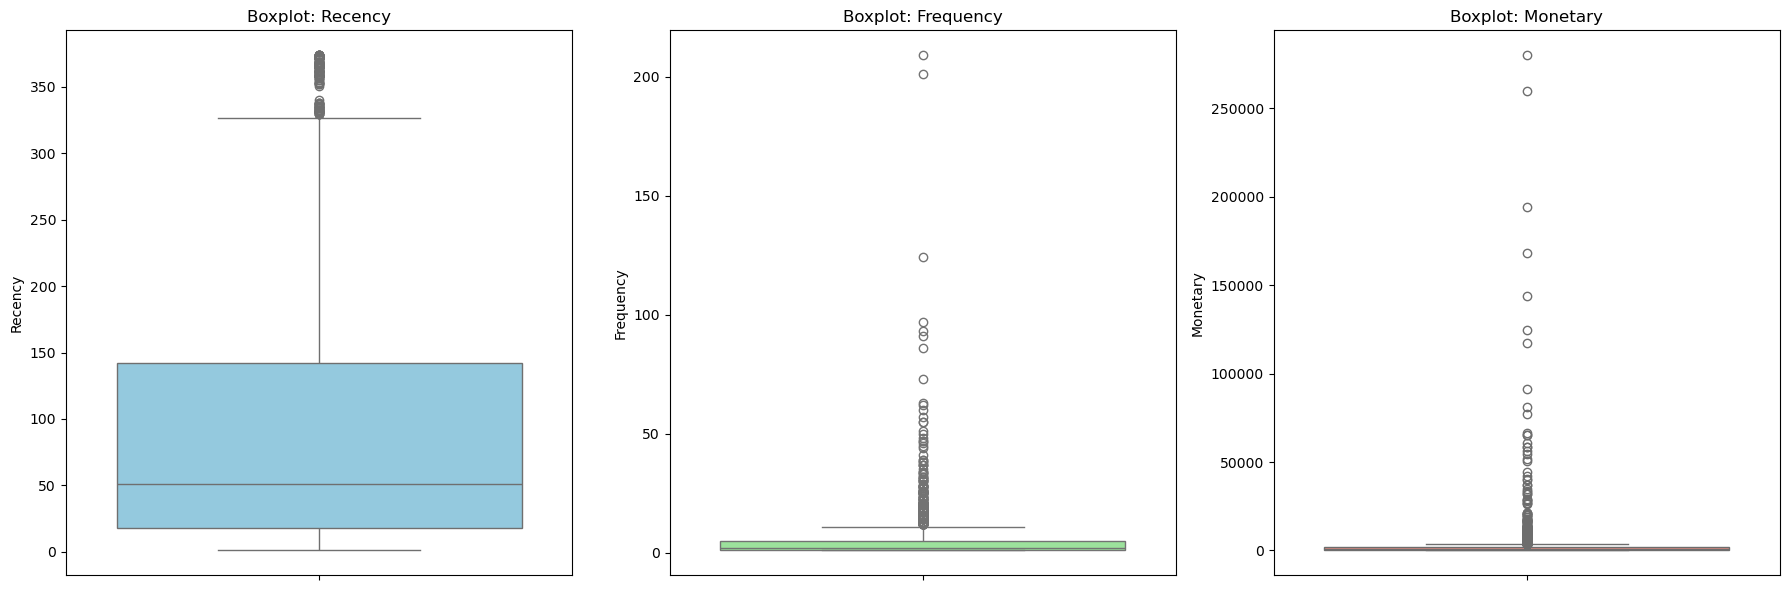

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up boxplots for Recency, Frequency, and Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=rfm['Recency'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot: Recency')

sns.boxplot(y=rfm['Frequency'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot: Frequency')

sns.boxplot(y=rfm['Monetary'], ax=axes[2], color='salmon')
axes[2].set_title('Boxplot: Monetary')

plt.tight_layout()
plt.show()


# Log Transofrmation

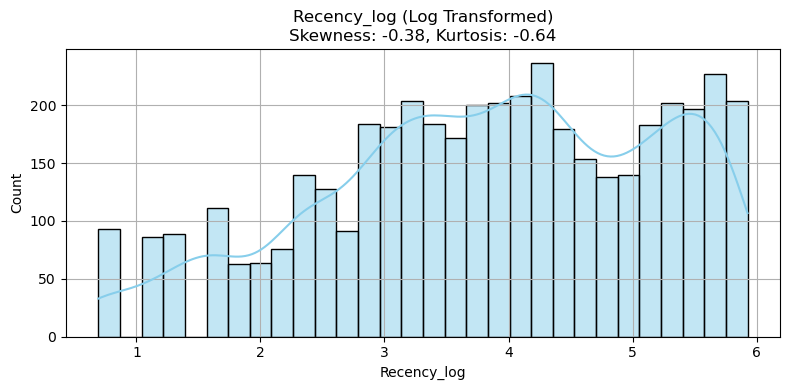

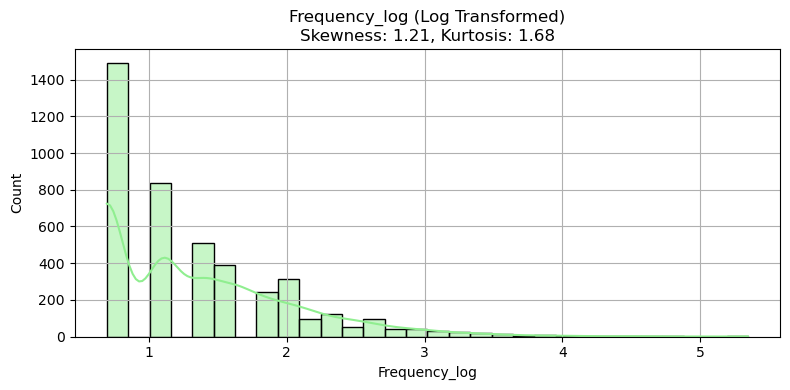

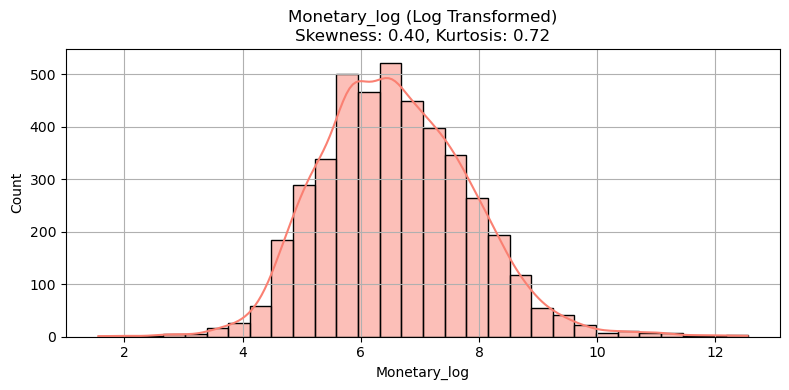

In [89]:
# Apply log(1 + x) transformation to RFM features
rfm_log = rfm.copy()
rfm_log['Recency_log'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency_log'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary_log'] = np.log1p(rfm_log['Monetary'])

# Function to visualize the transformed distributions
def plot_log_distribution(data, feature, color):
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], bins=30, kde=True, color=color)
    skew = data[feature].skew()
    kurt = data[feature].kurtosis()
    plt.title(f'{feature} (Log Transformed)\nSkewness: {skew:.2f}, Kurtosis: {kurt:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the transformed distributions
plot_log_distribution(rfm_log, 'Recency_log', 'skyblue')
plot_log_distribution(rfm_log, 'Frequency_log', 'lightgreen')
plot_log_distribution(rfm_log, 'Monetary_log', 'salmon')

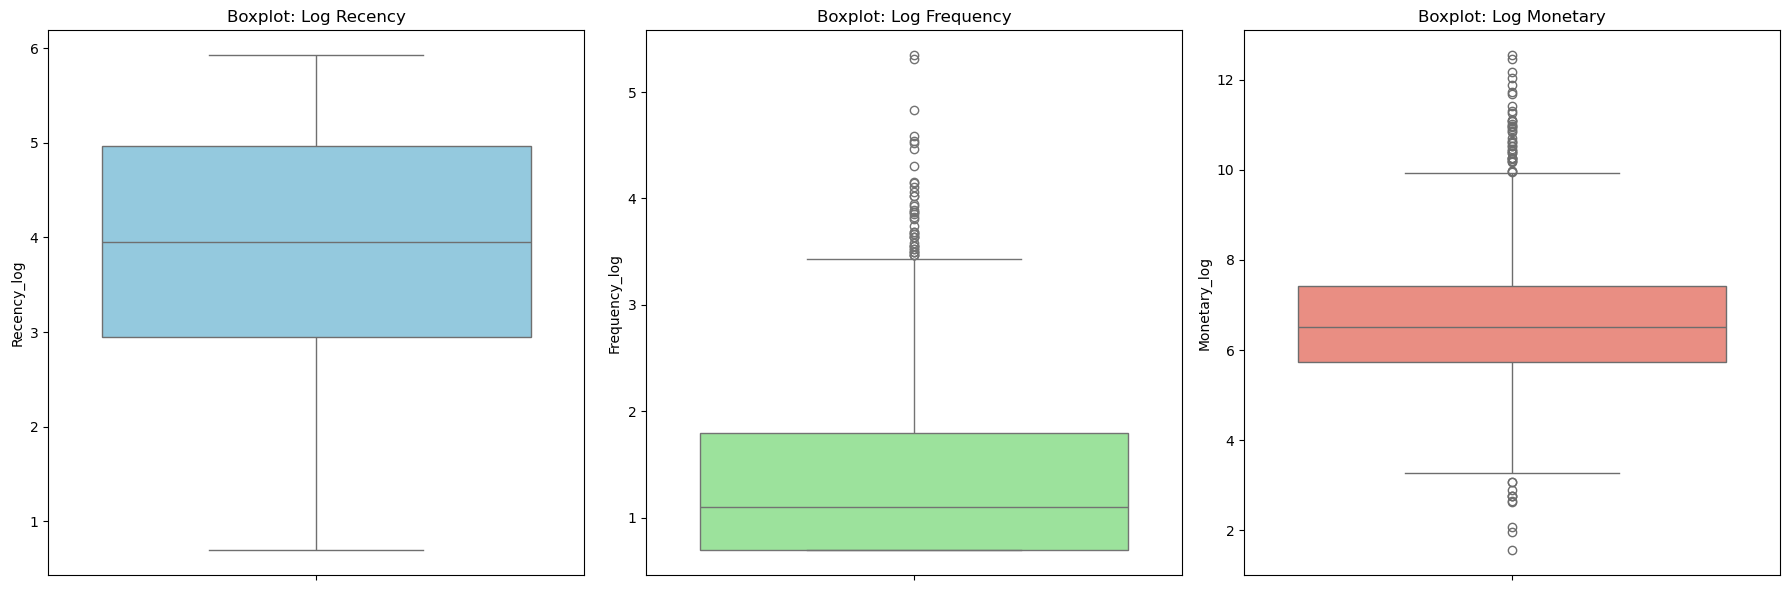

In [91]:
# Create boxplots for the log-transformed RFM features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=rfm_log['Recency_log'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot: Log Recency')

sns.boxplot(y=rfm_log['Frequency_log'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot: Log Frequency')

sns.boxplot(y=rfm_log['Monetary_log'], ax=axes[2], color='salmon')
axes[2].set_title('Boxplot: Log Monetary')

plt.tight_layout()
plt.show()


# Correlation

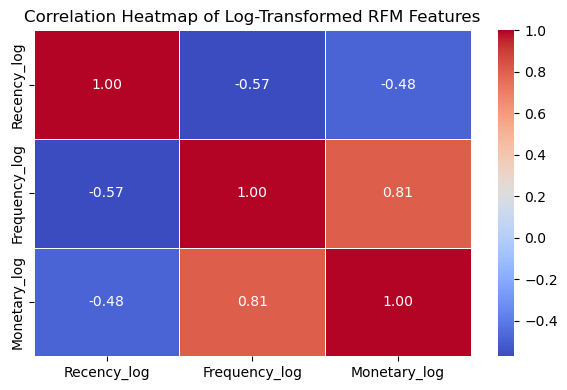

In [97]:
# Select only the log-transformed RFM features for correlation
rfm_log_corr = rfm_log[['Recency_log', 'Frequency_log', 'Monetary_log']]

# Compute the correlation matrix
corr_matrix = rfm_log_corr.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Log-Transformed RFM Features')
plt.tight_layout()
plt.show()


## Interpretation:
ðŸ“ˆ Frequency and Monetary go hand-in-hand â†’ good for customer value prediction.

ðŸ“‰ Recency adds its own flavor â€” not highly correlated, so it brings unique insight to clustering.

## Customer Segmentation Using KMeans Clustering

After calculating the RFM values for each customer, we use **KMeans clustering** to group customers into behavioral segments. First, we normalize the `Recency`, `Frequency`, and `Monetary` values using `StandardScaler` to ensure all features are on the same scale â€” this is important because KMeans uses distance-based calculations. We then apply the KMeans algorithm with `n_clusters=4` to find four distinct customer segments based on their purchasing behavior. Each customer is assigned a segment label (0 to 3), which we add as a new column called `Segment`. These clusters allow us to group similar customers together, such as high-value frequent buyers, recent one-time purchasers, or customers who haven't returned in a long time. This segmentation provides a foundation for targeted marketing and personalized business strategies.


In [99]:
# Select the log-transformed RFM features
X = rfm_log[['Recency_log', 'Frequency_log', 'Monetary_log']]

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

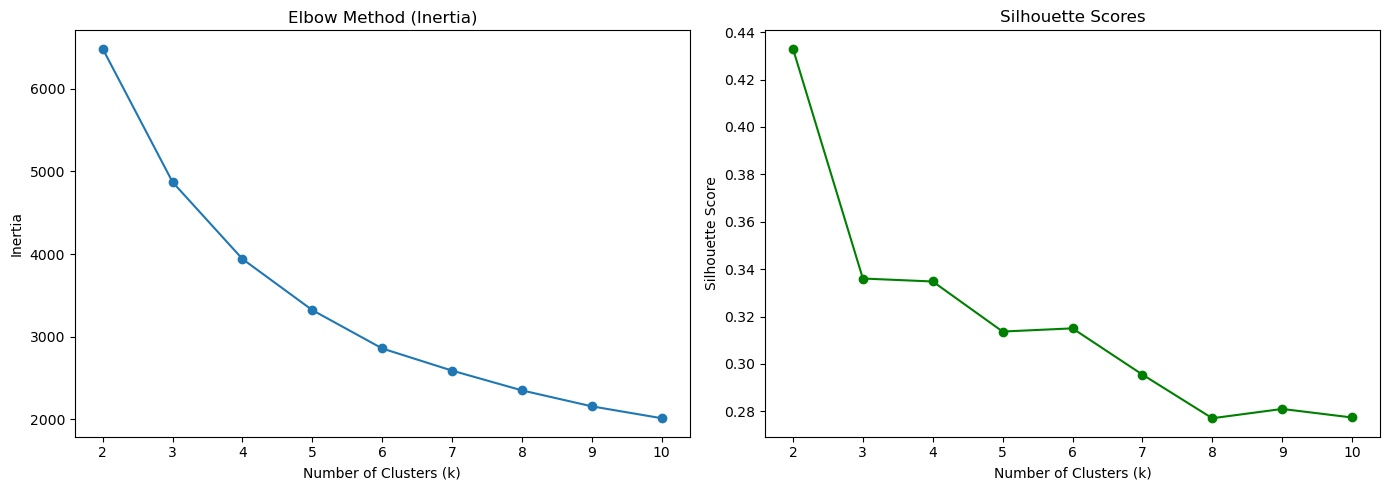

In [105]:
# Elbow method & Silhouette scores
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Step 4: Plot Elbow and Silhouette side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(k_range, inertia, marker='o')
axes[0].set_title('Elbow Method (Inertia)')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')

# Silhouette Scores
axes[1].plot(k_range, silhouette_scores, marker='o', color='green')
axes[1].set_title('Silhouette Scores')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

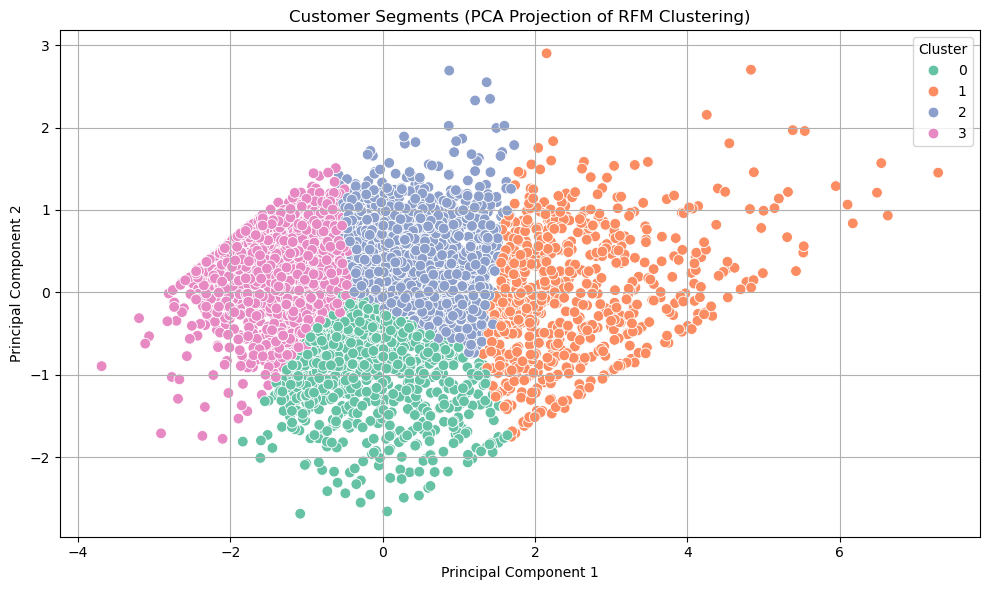

In [107]:
from sklearn.decomposition import PCA

# Step 1: Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_log['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 2: Reduce dimensions for 2D visualization using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
rfm_log['PCA1'] = pca_components[:, 0]
rfm_log['PCA2'] = pca_components[:, 1]

# Step 3: Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_log, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segments (PCA Projection of RFM Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [137]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(X_scaled, kmeans.labels_)
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(X_scaled, kmeans.labels_)


In [139]:
# Sample the data for silhouette score calculation
sample_size = 1000
X_sample = X_scaled[:sample_size]
labels_sample = rfm_log['Cluster'][:sample_size]

# Recalculate metrics using sampling where needed
silhouette = silhouette_score(X_sample, labels_sample)
davies_bouldin = davies_bouldin_score(X_scaled, rfm_log['Cluster'])
calinski_harabasz = calinski_harabasz_score(X_scaled, rfm_log['Cluster'])

# Store results
evaluation_results_sampled = {
    "Silhouette Score (sampled)": round(silhouette, 3),
    "Davies-Bouldin Index": round(davies_bouldin, 3),
    "Calinski-Harabasz Index": round(calinski_harabasz, 2)
}

evaluation_results_sampled


{'Silhouette Score (sampled)': 0.33,
 'Davies-Bouldin Index': 1.016,
 'Calinski-Harabasz Index': 3327.93}

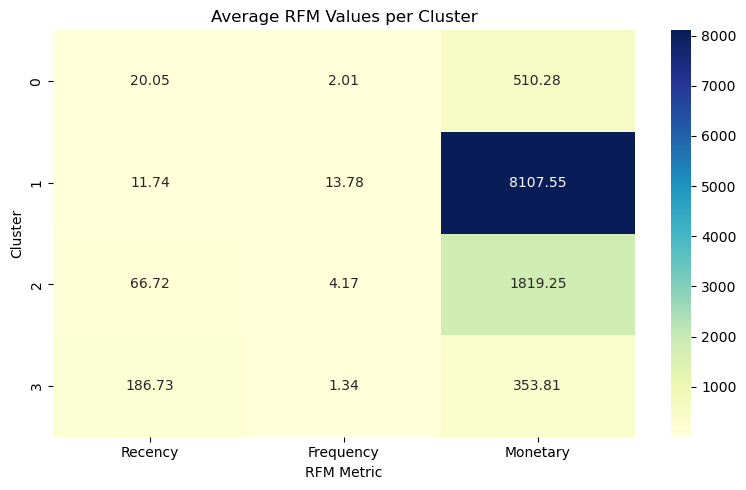

In [141]:
# Merge the original RFM values with cluster labels
rfm_log['Recency'] = rfm['Recency']
rfm_log['Frequency'] = rfm['Frequency']
rfm_log['Monetary'] = rfm['Monetary']

# Group by Cluster and calculate mean of original RFM
cluster_summary = rfm_log.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)

# Count of customers per cluster
cluster_summary['Num_Customers'] = rfm_log['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary.drop(columns='Num_Customers'), annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average RFM Values per Cluster')
plt.xlabel('RFM Metric')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


In [113]:
cluster_summary

Recency  Frequency  Monetary  Num_Customers
Cluster                                             
0          20.05       2.01    510.28            856
1          11.74      13.78   8107.55            707
2          66.72       4.17   1819.25           1185
3         186.73       1.34    353.81           1590

In [115]:
# Define a mapping of cluster labels to business segment names
segment_map = {
    1: 'VIP Customers',
    0: 'Recent Low Spenders',
    2: 'Loyal Mid-Spenders',
    3: 'At-Risk / Churned'
}

# Assign the segment labels
rfm_log['SegmentLabel'] = rfm_log['Cluster'].map(segment_map)

# Show a sample of the labeled dataset
rfm_log[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'SegmentLabel']].head(10)


CustomerID  Recency  Frequency  Monetary  Cluster         SegmentLabel
0    12346.0      326          1  77183.60        2   Loyal Mid-Spenders
1    12347.0        2          7   4310.00        1        VIP Customers
2    12348.0       75          4   1797.24        2   Loyal Mid-Spenders
3    12349.0       19          1   1757.55        0  Recent Low Spenders
4    12350.0      310          1    334.40        3    At-Risk / Churned
5    12352.0       36          8   2506.04        2   Loyal Mid-Spenders
6    12353.0      204          1     89.00        3    At-Risk / Churned
7    12354.0      232          1   1079.40        3    At-Risk / Churned
8    12355.0      214          1    459.40        3    At-Risk / Churned
9    12356.0       23          3   2811.43        2   Loyal Mid-Spenders

In [119]:
rfm_log.shape


(4338, 11)

In [121]:
# Compare original dataset shape vs. final RFM segmented dataset shape
original_shape = df.shape[0]
rfm_shape = rfm.shape[0]
segmented_shape = rfm_log.shape[0]

# Count how many customers are in each segment
segment_counts = rfm_log['SegmentLabel'].value_counts()

original_shape, rfm_shape, segmented_shape, segment_counts


(392692,
 4338,
 4338,
 SegmentLabel
 At-Risk / Churned      1590
 Loyal Mid-Spenders     1185
 Recent Low Spenders     856
 VIP Customers           707
 Name: count, dtype: int64)

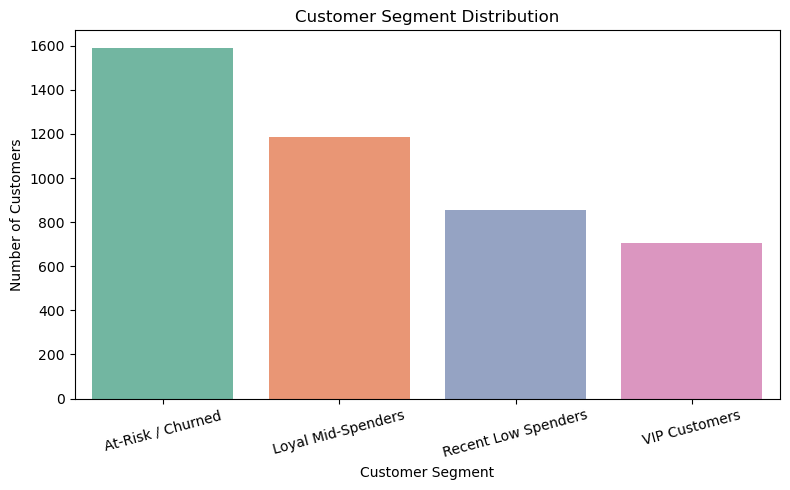

In [125]:
# Visualize segment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm_log, x='SegmentLabel', order=rfm_log['SegmentLabel'].value_counts().index, palette='Set2')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [127]:
# Export the segmented dataset to CSV
export_path = "segmented_customers_rfm.csv"
rfm_log.to_csv(export_path, index=False)

export_path

'segmented_customers_rfm.csv'